# Unsupervised Learning - Overview

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [0]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score

In [0]:
n = 1000
X, y = make_blobs(n_samples=n, centers=3, n_features=2, random_state=0)

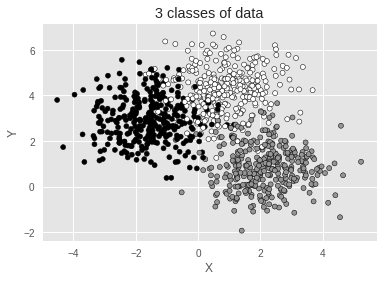

In [41]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.title("3 classes of data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

Instead of performing classification on this problem, we can withhold the labels from our model and apply a clustering algorithm instead. Let's apply [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to this example and predict the clusters each point will belong to.

In [0]:
# Create a model named `model` using KMeans with k = 3
# Fit the model to the training data
# Predict the classes of the test data and save those as y_pred
# YOUR CODE HERE
# raise NotImplementedError()

# Create a model
model = KMeans(n_clusters = 3)

# Fit model to training data (X_train)
model.fit(X_train,y_train)

# Predict the classes of the test data
y_pred = model.fit_predict(X_test)


In [0]:
assert len(model.cluster_centers_) == 3
assert len(y_pred) == len(y_test)

We can access the learned cluster centroids using the `cluser_centers_` attribute of the trained model. Let's plot the centroids on top of our data.

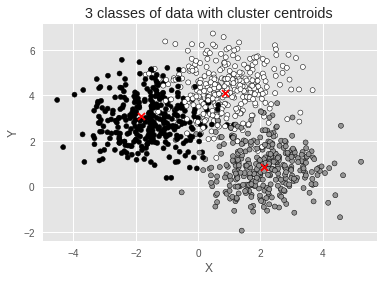

In [45]:
centroids = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="r")
plt.title("3 classes of data with cluster centroids")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Now that we have our predictions, we can determine how well our model works using a variety of metrics for unsupervised learning. First, let's create the contingency table/matrix for our data. This is similar to a confusion matrix but the diagonal is irrelevant as the cluster names won't align with the original classes.

The following may be useful:

- Python Sets - [sets](https://docs.python.org/3.6/tutorial/datastructures.html)
- Creating a matrix with all zeros: [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)
- Boolean indexing with numpy: [indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html)
- Logic operations on numpy arrays: [logic operations](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.logic.html#logical-operations)

In [0]:
import itertools

def contingency_table(y_1, y_2):
    """Determine the contingency matrix based on two sets of element groupings
    
    Args:
        y_1 (iterable): A labeling of elements into clusters
        y_2 (iterable): Another labeling of elements into clusters
    
    Returns:
        np.ndarray: A matrix with shape n_groups_y1, n_groups_y2 listing the number of 
                    elements from one cluster in y1 that are also in one cluster in y2 
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    # SETS group for every cluser of x and y
    n_groups_y1 = set(y_1)
    n_groups_y2 = set(y_2)
    
    # NP.ZEROS the shape should be the number of clusters in each groups
    matrix = np.zeros((len(y_1),len(y_2)))
    
    # INDEXING
    classes = list(n_groups_y1)
    n = len(classes)
    
    #error = np.array([zip(y_1,y_2).count(x) for x itertools.product(classes,repeat=2)]).reshape(n,n)
    #print error
    
    error = np.array([z.count(x) for z in [zip(y_1,y_2)] for x in itertools.product(classes,repeat=2)]).reshape(n,n)
    print error
    
    return error
    
    #for i in y_1:
    #  for j in y_2:
        #if i == j 
    # Check if i = j
    #sum(np.logical_and(mp.array() == 0, np.array() ==1))
        
    

In [47]:
test_cont = contingency_table(np.array([0,0,1,2,2]), np.array([1,1,1,0,2]))
assert test_cont.shape == (3,3)
assert np.all(test_cont.T == contingency_table(np.array([1,1,1,0,2]), np.array([0,0,1,2,2])))

[[0 2 0]
 [0 1 0]
 [1 0 1]]
[[0 0 1]
 [2 1 0]
 [0 0 1]]


In [48]:
contingency_table(y_test, y_pred)

[[52  5  1]
 [ 4  0 67]
 [ 7 63  1]]


array([[52,  5,  1],
       [ 4,  0, 67],
       [ 7, 63,  1]])

Let's examine our model's performance scores based on the other metrics:

In [49]:
import sys
def printf(format, *args):
    sys.stdout.write(format % args)
printf("Our model has an adjusted rand index of {adjusted_rand_score(y_test, y_pred):.4}")

Our model has an adjusted rand index of {adjusted_rand_score(y_test, y_pred):.4}

In [50]:

printf("Our model has an adjusted mutual information score of {adjusted_mutual_info_score(y_test, y_pred):.4}")

Our model has an adjusted mutual information score of {adjusted_mutual_info_score(y_test, y_pred):.4}

In [51]:
h,c,v = homogeneity_completeness_v_measure(y_test, y_pred)

printf("Our model has a homogeneity score of {h:.4}, completeness score of {c:.4}, and a v-measure of {v:.4}.")

Our model has a homogeneity score of {h:.4}, completeness score of {c:.4}, and a v-measure of {v:.4}.

Now let's use the silhoutte score and gridsearch on the validation data to determine the best value of k for KMeans. We already expect it to be 3 since we know that is the ground truth however that doesn't mean we are guaranteed the highest score at $k=3$.

In [0]:
def score_ks(ks, features):
    """Get silhoutte scores of applying KMeans to a set of features with a variety of k values 
    
    Args:
        ks (iterable): List of k values to experiment with
        features (iterable): The features to train the model on
    
    Returns:
        iterable: A list of scores of models trained using each value of k
    """
    # YOUR CODE HERE
    avg_scores = {}
    for n_clusters in ks:
      model = KMeans(n_clusters = n_clusters)
      model_labels = model.fit_predict(features)
      avg_scores[n_clusters] = silhouette_score(features,model_labels)
      scores[n_clusters] = sk.metrics.silhouette_score(features,model_labels)
 #  scores = silhouette_samples(features, model_labels)

    return scores
    

In [71]:
ks = [2,3,4,5,6,10]
scores = score_ks(ks, X)
len(ks)
scores
print(scores)
scores = [0.4686945393573536, 0.4802083963842474, 0.39215130574453966, 0.37331553061553086,0.3541915931988147,0.33595286886303727]

{2: 0.4686945393573536, 3: 0.4802083963842474, 4: 0.38803940158579464, 5: 0.3686800776378008, 6: 0.35095720101936223, 10: 0.3377922831361703}


In [0]:
assert len(scores) == len(ks)
assert scores[1] == max(scores)

In [73]:
maxScore = 0
bestK = ks[0]
for k, score in zip(ks, scores):
    if score > maxScore:
        bestK = k
        maxScore = score
    printf("With k = {k}, the silhoute score is {score:.4f}")
    
printf("\n\nThe best k value is k={bestK}, scoring {maxScore:.4f}")

With k = {k}, the silhoute score is {score:.4f}With k = {k}, the silhoute score is {score:.4f}With k = {k}, the silhoute score is {score:.4f}With k = {k}, the silhoute score is {score:.4f}With k = {k}, the silhoute score is {score:.4f}With k = {k}, the silhoute score is {score:.4f}

The best k value is k={bestK}, scoring {maxScore:.4f}

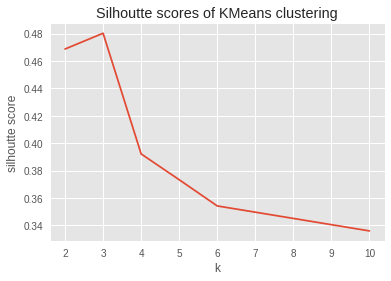

In [74]:
plt.plot(ks, scores)
plt.xlabel("k")
plt.ylabel("silhoutte score")
plt.title("Silhoutte scores of KMeans clustering")
plt.show()

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    raise NotImplementedError()